#Ejercicio de ejemplo para descarga de datos

In [ ]:
!pip install -q condacolab
!pip uninstall matplotlib -y
!pip install -q condacolab
!git clone https://github.com/zorzalerrante/aves.git aves_git
!mamba env update --name base --file aves_git/environment-colab.yml
import condacolab
condacolab.install_mambaforge()
!pip install matplotlib

In [ ]:
import numpy as np
import requests
import pandas as pd
from copy import deepcopy
import pandas._testing as tm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
from google.colab import files
import matplotlib.pyplot as plt
#from aves.features.utils import normalize_rows
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib.pyplot import plot

In [ ]:
#Datos
tasas= {'bcu1' : "F022.BUF.TIS.AN01.UF.Z.D",
        'bcu2' : "F022.BUF.TIS.AN02.UF.Z.D", 
        'bcu5' : "F022.BUF.TIS.AN05.UF.Z.D",
        'bcu10': "F022.BUF.TIS.AN10.UF.Z.D",
        'bcu20': "F022.BUF.TIS.AN20.UF.Z.D",
        'bcu30': "F022.BUF.TIS.AN30.UF.Z.D"}

#Parametros

In [ ]:
url0="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user="
user=""
pw=""
i="1996-01-01"
f="2022-12-31"

#Loop para descarga

In [ ]:
data = []
for key in tasas:
  url = url0 + user + "&pass=" + pw + "&firstdate=" + i + "&lastdate=" + f + "&timeseries=" + tasas[key]+ "&function=GetSeries"
  response = requests.get(url)
  response = response.json()
  response = response["Series"]["Obs"]
  df_data = pd.DataFrame(response)
  df_data['tipo']=key
  data.append(df_data)

In [ ]:
data

In [ ]:
df = pd.concat(data, axis=0, ignore_index=True)
df.columns=['Date', 'Valor', 'Codigo', 'Tipo']
df=df[['Date', 'Valor', 'Tipo']]
df['Valor'] = df['Valor'].apply(pd.to_numeric, errors='coerce')
df['Tipo'] = df['Tipo'].astype("string")
df = df[df['Valor'].notna()]
df['Valor'] = df['Valor'].round(3)
df['month'] = df['Date'].str[3:5]
df['year'] = df['Date'].str[6:10]
df['day'] = df['Date'].str[0:2]
df['Date']= pd.to_datetime(df[["year", "month", "day"]]).dt.strftime('%Y-%m-%d')
df['Date']=pd.to_datetime(df['Date'])
#para grafico en Plotly
df=df.pivot(index=["Date","year", 'month', 'day'], columns="Tipo", values="Valor").reset_index()
df=df.sort_values(by=['Date'])
df.to_csv('bcus.csv') 

In [ ]:
df

In [ ]:
sns.set_style('whitegrid')
# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [ ]:
def plot_nameseries(names):
    fig, ax = plt.subplots(figsize=(12, 4))
    names.plot(
        ax=ax,
        color=sns.color_palette("plasma", n_colors=len(names.columns)),
        linewidth=2,
    )
    fig.set_facecolor("#efefef")
    ax.set_facecolor("#efefef")
    sns.despine(ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("Porcentaje")
    fig.tight_layout()
    return fig, ax

In [ ]:
df1=df.set_index('Date')

Text(0.0, 1.0, 'Tasas de Interes de los Bonos del BCCh')

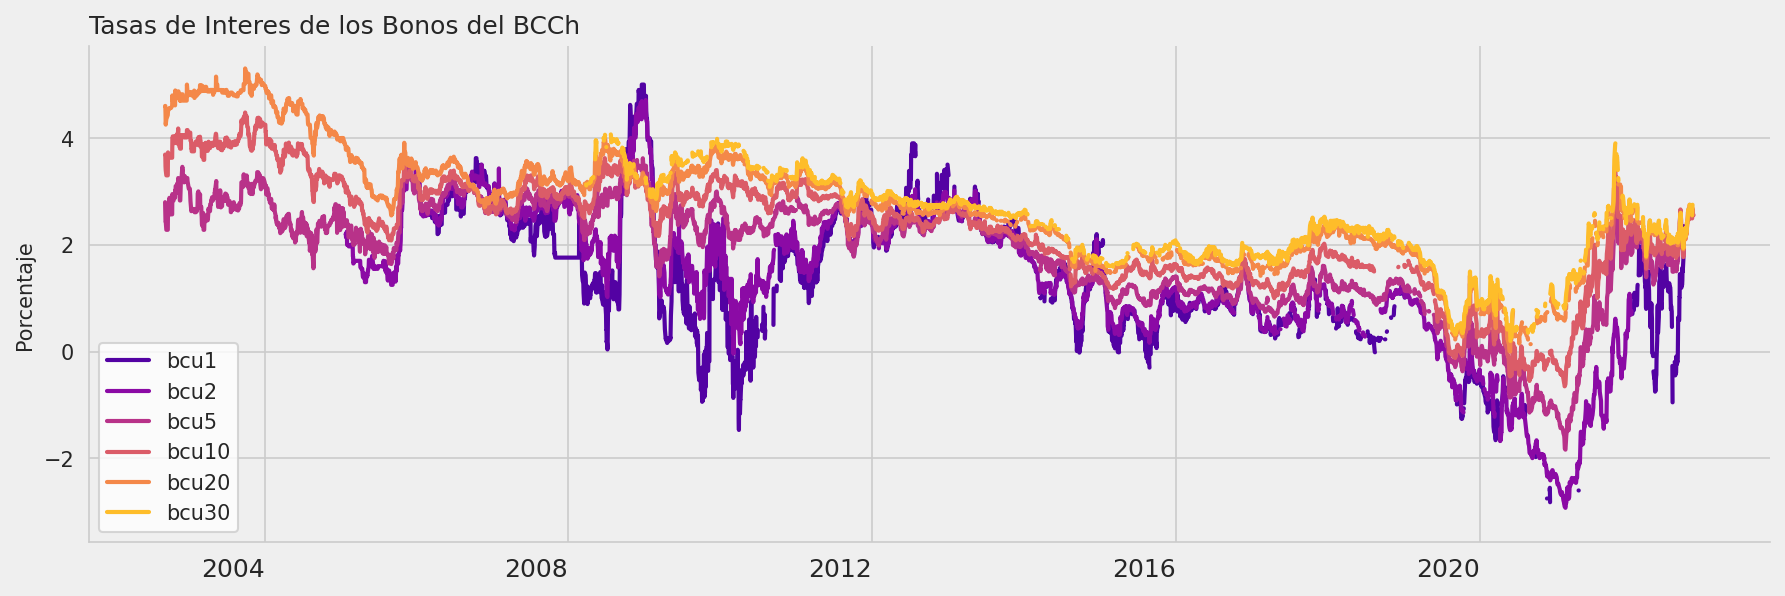

In [ ]:
#df=df.set_index('Date')
fig, ax = plot_nameseries(df1[["bcu1", "bcu2", "bcu5", "bcu10", "bcu20", "bcu30"]])
ax.xaxis.set_tick_params(labelsize='large')
plt.xticks(rotation=0)
ax.legend()
ax.set_title("Tasas de Interes de los Bonos del BCCh", loc="left")

In [ ]:
!pip install -q plotly==4.2.1

In [ ]:
import plotly.express as px

fig = px.line(df,x="Date", y='bcu5',title='Bonos Banco Central en UF')
fig.add_scatter(x=df['Date'], y=df['bcu10'],mode='lines')
fig.update_yaxes(title_text='Porcentaje')
fig.update_layout(showlegend=False)

fig.show()

#Ejemplo en R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("rjson")

In [ ]:
%%R #Para trabajar con R
system('sudo apt-get install -y rjson-dev', intern=TRUE)    

NULL


In [ ]:
%%R
library("rjson")

In [ ]:
%%R
url0="https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?user="
user="154100601"
pw="qnpMKgsTXeSM4Sj"
i="1996-01-01"
f="2022-12-31"

In [ ]:
%%R
bcu1 = "F022.BUF.TIS.AN01.UF.Z.D"
bcu2 = "F022.BUF.TIS.AN02.UF.Z.D"
bcu5 = "F022.BUF.TIS.AN05.UF.Z.D"
bcu10 = "F022.BUF.TIS.AN10.UF.Z.D"
bcu20 = "F022.BUF.TIS.AN20.UF.Z.D"
bcu30 = "F022.BUF.TIS.AN30.UF.Z.D"

In [ ]:
%%R
bonos <- c(bcu1, bcu2, bcu5, bcu10, bcu20, bcu30)

In [ ]:
%%R
bonos[[1]]

[1] "F022.BUF.TIS.AN01.UF.Z.D"


In [ ]:
%%R
datalist = list()
for (x in bonos) {
  url1=paste0(url0, user,"&pass=", pw,
              "&firstdate=",i,
              "&lastdate=",
              f,
              "&timeseries=",x,
              "&function=GetSeries")
  json_data <- rjson::fromJSON(file=url1)
  df_data <- as.data.frame(do.call(rbind, lapply(json_data$Series$Obs, as.vector)))
  df_data$Tipo <- x
  datalist[[x]] <- df_data
}
big_data = do.call(rbind, datalist)

In [ ]:
%%R
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN01.UF.Z.D'] <- 'bcu1'  
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN02.UF.Z.D'] <- 'bcu2'
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN05.UF.Z.D'] <- 'bcu5'
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN10.UF.Z.D'] <- 'bcu10'
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN20.UF.Z.D'] <- 'bcu20'
big_data$Tipo[big_data$Tipo == 'F022.BUF.TIS.AN30.UF.Z.D'] <- 'bcu30'

In [ ]:
%%R
colnames(big_data)[1] <- "Date"
big_data$statusCode <- NULL
rownames(big_data) <- 1:nrow(big_data) 
big_data$value<- as.numeric(big_data$value)
big_data <- na.omit(big_data) 
names(big_data) 

[1] "Date"  "value" "Tipo" 


In [ ]:
%%R
library(tidyr)
data_wide = spread(big_data, Tipo, value)
head(data_wide)

In [ ]:
%%R
install.packages('plotly')

In [ ]:
%%R
install.packages("ggplot2")

In [ ]:
%%R
library(plotly)
library(ggplot2)

fig <- plot_ly(data_wide, x = ~Date, y = ~bcu5, type = 'scatter', mode = 'lines')

fig